In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
from src.inductive_bias import IB
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

cmap = 'PRGn'

ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded


## Time and Date of the experiment

In [3]:
print(ib.date)

2021-04-04 23:39:37.222350


In [4]:
# ib.load_human()
ib.load_MTurk()

## `human` attribute is structured as follows: $ D_{i=0} = \text{S-XOR}, D_{i=1} = \text{Spiral} $

In [5]:
len(ib.human)

2

## each dataset of `human` attribute is structured as follows: 
$ D_{j=0}: \text{human estimate}\\ D_{j=1}: \text{true posterior}\\ D_{j=2}: \text{dataset type (0: S-XOR, 1: Spiral)}\\ D_{j=3}: \text{x-coordinate}\\ D_{j=4}: \text{euclidean distance from the origin (0,0)}\\ D_{j=5}: \text{y-coordinate}\\ D_{j=6}: \text{hellinger distance between human estimate and true posterior}\\ D_{j=7}: \text{participant ID} $

`['est', 'real', 'mtype', 'x', 'd', 'y', 'hellinger', 'id']`

In [6]:
ib.human[0].shape

(6322, 8)

In [29]:
uX = ib.generate_mask(rng=3)
uX0, uX1 = uX[:,0], uX[:,1]

method = ['nearest', 'linear', 'cubic']
rng = 3

MT2 = ib.human[0]
MT4 = ib.human[1]

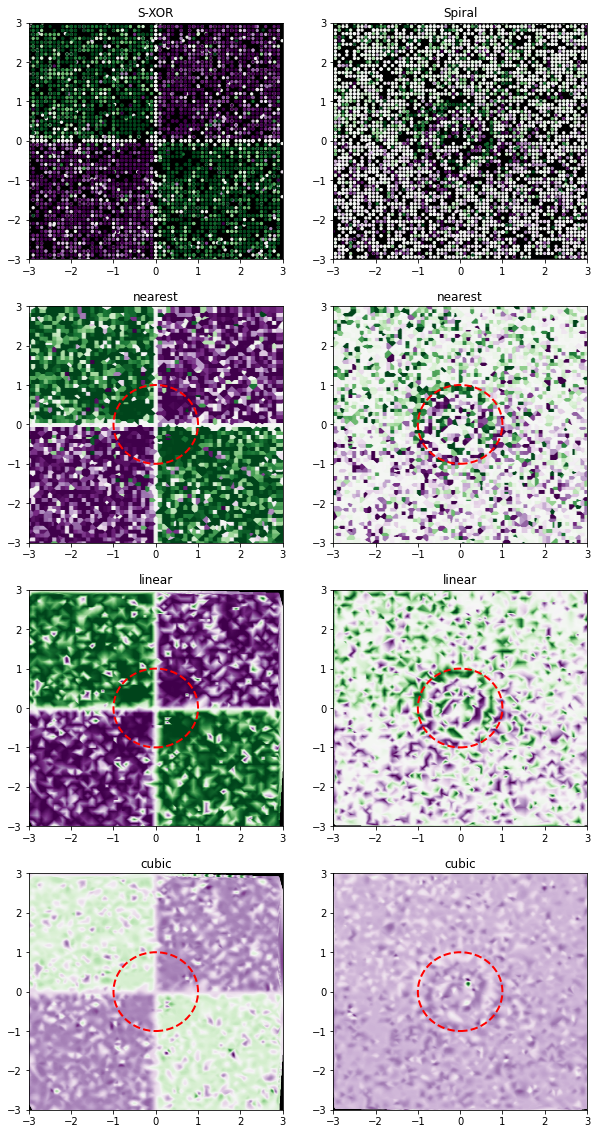

In [49]:
fig, ax = plt.subplots(4,2, figsize=(5*2,5*4))

for f in range(4):
    if f == 0:
        ax[f,0].scatter(MT2[:,3],MT2[:,5], c=MT2[:,0], cmap='PRGn',s=5)
        ax[f,0].set_facecolor('k')
        ax[f,1].scatter(MT4[:,3],MT4[:,5], c=MT4[:,0], cmap='PRGn',s=5)
        ax[f,1].set_facecolor('k')
        ax[f,0].set_title('S-XOR')
        ax[f,1].set_title('Spiral')
    # elif f == 3:
    else:
        grid_near = griddata((MT2[:,3], MT2[:,5]), MT2[:,0], (uX0,uX1), method=method[f-1], rescale=False)
        ax[f,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)#, axisbg='black'
        ax[f,0].set_facecolor('k')
        ax[f,0].add_patch(Circle((0,0), radius=1, linewidth=2, ls='--',edgecolor='r', fill=False))
        
        grid_near = griddata((MT4[:,3], MT4[:,5]), MT4[:,0], (uX0,uX1), method=method[f-1], rescale=False)
        ax[f,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
        ax[f,1].set_facecolor('k')
        ax[f,1].add_patch(Circle((0,0), radius=1, linewidth=2, ls='--',edgecolor='r', fill=False))

        ax[f,0].set_title(method[f-1])
        ax[f,1].set_title(method[f-1])

    ax[f,0].set_xlim([-rng,rng])
    ax[f,0].set_ylim([-rng,rng])
    ax[f,1].set_xlim([-rng,rng])
    ax[f,1].set_ylim([-rng,rng])

plt.savefig(f'figs/[20210330_read_MTurk]_human_interpolation_{str(ib.date.date())}.png', bbox_inches='tight')

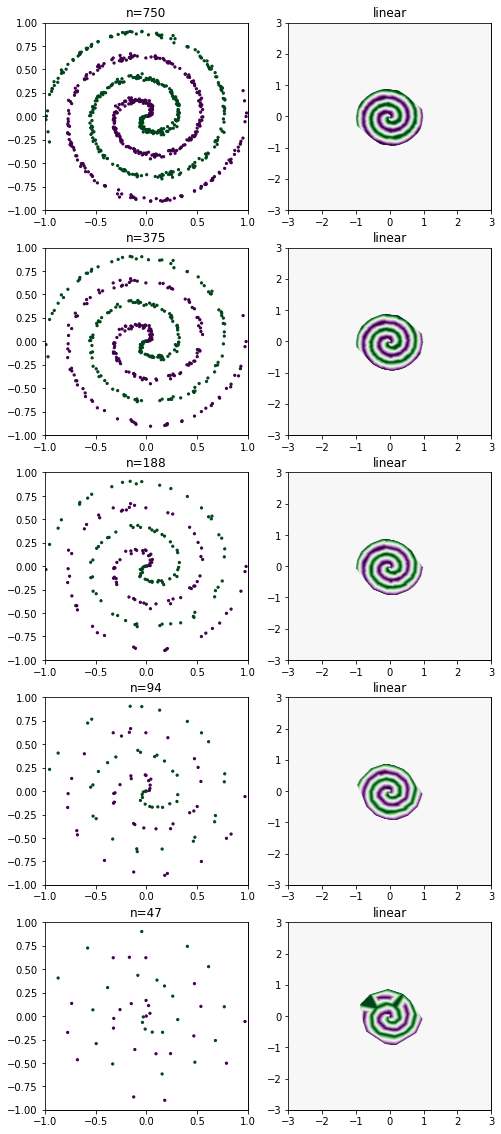

In [34]:
X = ib.generate_spirals(N=750,K=2)
X1, X2 = X[0][:,0], X[0][:,1]
y = X[1]

method_num = 1

cnt = 0
fig, axs = plt.subplots(5,2, figsize=(4*2,4*5))
plt.setp(axs, xticks=[], yticks=[])
for i, n in enumerate([1,2,4,8,16]):    #1,2,4,8,16
    cnt += 1
    axs = fig.add_subplot(5,2,cnt)
    axs.scatter(X1[::n],X2[::n],c=y[::n], s=5, cmap=cmap)
    axs.set_title('n={}'.format(y[::n].size))
    plt.setp(axs, xlim=[-1,1], ylim=[-1,1])

    cnt += 1
    axs = fig.add_subplot(5,2,cnt)
    grid_near = griddata((X1[::n],X2[::n]),y[::n], (uX0,uX1), method=method[method_num], fill_value=0.5, rescale=False)
    axs.scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
    axs.set_title(method[method_num])
    plt.setp(axs, xlim=[-3,3], ylim=[-3,3])

# filename = 'figs/' + str(datetime.today())[:10] + '_interpolation.png'
# plt.savefig(filename, bbox_inches='tight')

Text(0.5, 1.0, 'rescale on')

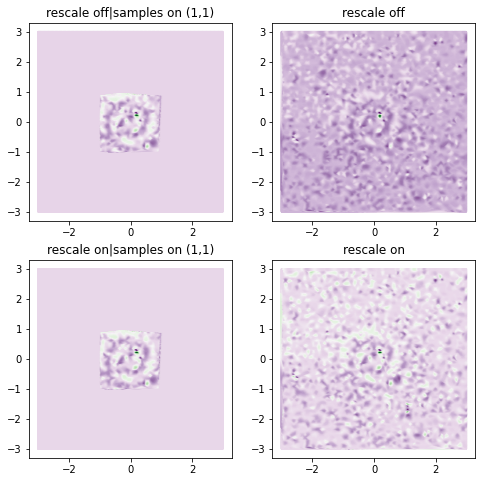

In [14]:
MT = MT4

temp_idx_3 = (MT[:,3] <= 1) * (MT[:,3] >= -1)
temp_idx_5 = (MT[:,5] <= 1) * (MT[:,5] >= -1)
temp_idx = temp_idx_3 * temp_idx_5

# (MT_4[:,3] <= 1 * MT_4[:,3] >= -1)
fig, axs = plt.subplots(2,2, figsize=(4*2,4*2))
grid_near = griddata((MT[:,3][temp_idx],MT[:,5][temp_idx]),MT[:,0][temp_idx], (uX0,uX1), method=method[2], fill_value=0.5, rescale=False)
axs[0,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[0,0].set_title('rescale off|samples on (1,1)')

grid_near = griddata((MT[:,3][:],MT[:,5][:]),MT[:,0][:], (uX0,uX1), method=method[2], fill_value=0.5, rescale=False)
axs[0,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[0,1].set_title('rescale off')

grid_near = griddata((MT[:,3][temp_idx],MT[:,5][temp_idx]),MT[:,0][temp_idx], (uX0,uX1), method=method[2], fill_value=0.5, rescale=True)
axs[1,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[1,0].set_title('rescale on|samples on (1,1)')

grid_near = griddata((MT[:,3][:],MT[:,5][:]),MT[:,0][:], (uX0,uX1), method=method[2], fill_value=0.5, rescale=True)
axs[1,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[1,1].set_title('rescale on')

# filename = 'figs/' + str(datetime.today())[:10] + '_interpolation_rescale.png'
# plt.savefig(filename, bbox_inches='tight')

In [38]:
import numpy as np

In [39]:
ib.mask.shape, np.array(ib.hdist).shape

((739600, 2), (2, 5, 4, 739600))

In [8]:
# np.array(ib.estpst).shape, ib.hdist.shape


In [9]:
# ib.estpst[0][0][2]
ib.estpst[0][0][0][:,0].shape

(739600,)

In [10]:
# np.array(ib.human[0]).shape

In [11]:
ib.mask.shape
np.column_stack([ib.mask, ib.estpst[0][0][0][:,0]]).shape

(739600, 3)

In [12]:
temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[0][0][0]]))
len(temp[0])

30

In [40]:
temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[0][0][0]]))
len(temp[0])

30

In [35]:
import seaborn as sns

In [66]:
import pandas as pd

In [219]:
# np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
# ib.human[0][:,0]
# ib.human[0][:,6]
np.column_stack([hmask, ib.human[0][:,0]]).astype(float)

array([[ 2.4 ,  2.1 ,  0.53],
       [ 1.5 ,  0.7 ,  0.25],
       [ 1.2 ,  0.9 ,  0.5 ],
       ...,
       [-0.3 , -1.8 ,  0.09],
       [-1.1 ,  2.3 ,  0.96],
       [ 2.9 , -1.7 ,  0.94]])

In [218]:
np.column_stack([ib.mask, ib.estpst[0][2][i]])

array([[-4.3       , -4.3       ,  0.97831268],
       [-4.29      , -4.3       ,  0.97828963],
       [-4.28      , -4.3       ,  0.97826655],
       ...,
       [ 4.27      ,  4.29      ,  0.02192259],
       [ 4.28      ,  4.29      ,  0.02189932],
       [ 4.29      ,  4.29      ,  0.02187607]])

<AxesSubplot:xlabel='Radial Distance from origin', ylabel='Distance'>

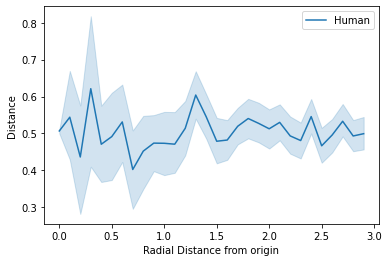

In [222]:
hmask = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])

temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,0]]).astype(float))
temp2 = pd.DataFrame(temp[1]).T
temp2.columns=temp[0]
temp2 = temp2.melt().dropna()
temp2.columns=['Radial Distance from origin', 'Distance']
sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label='Human')




In [ ]:
fsize= 18
label = ib.mtype + ['Human']
titles = ['Class 1 Posterior', 'Hellinger Distance']

## S-XOR radial plots

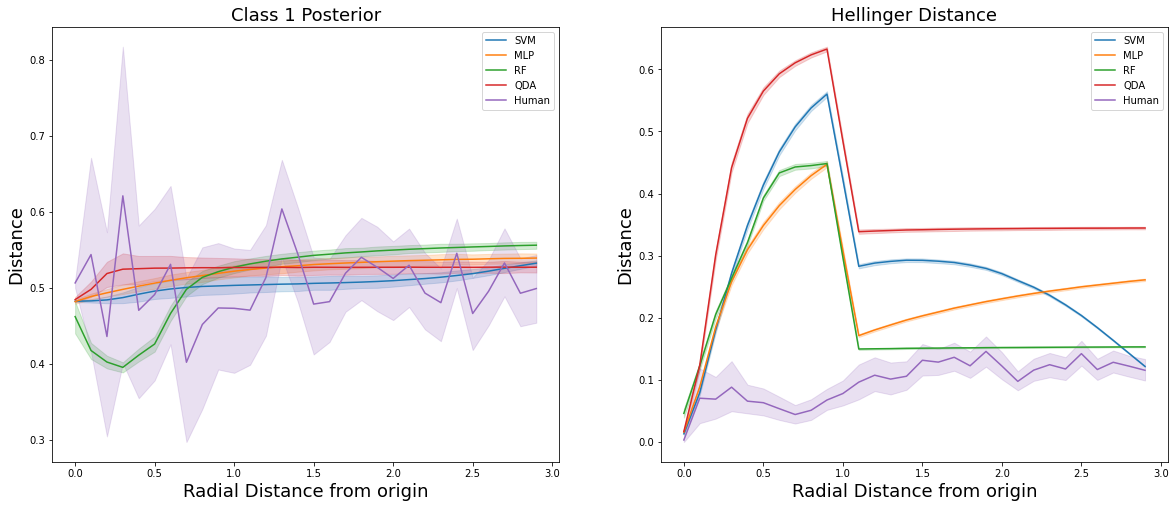

In [236]:
fig, axs = plt.subplots(1,2, figsize=(10*2,8))

for j in range(2):
    for i in range(5):
        
        if i == 4:
            
            hmask = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,0]]).astype(float))
            else:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,6]]).astype(float))
        else:
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][4][i]]))
            else:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[1][4][i]]))

        temp2 = pd.DataFrame(temp[1]).T
        temp2.columns = temp[0]
        temp2 = temp2.melt().dropna()
        temp2.columns=['Radial Distance from origin', 'Distance']
        axs[j].set_title(titles[j], fontsize=fsize)
        axs[j].set_xlabel(temp2.columns[0], fontsize=fsize)
        axs[j].set_ylabel(temp2.columns[1], fontsize=fsize)
        sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i], ax=axs[j])

## Spiral radial plots

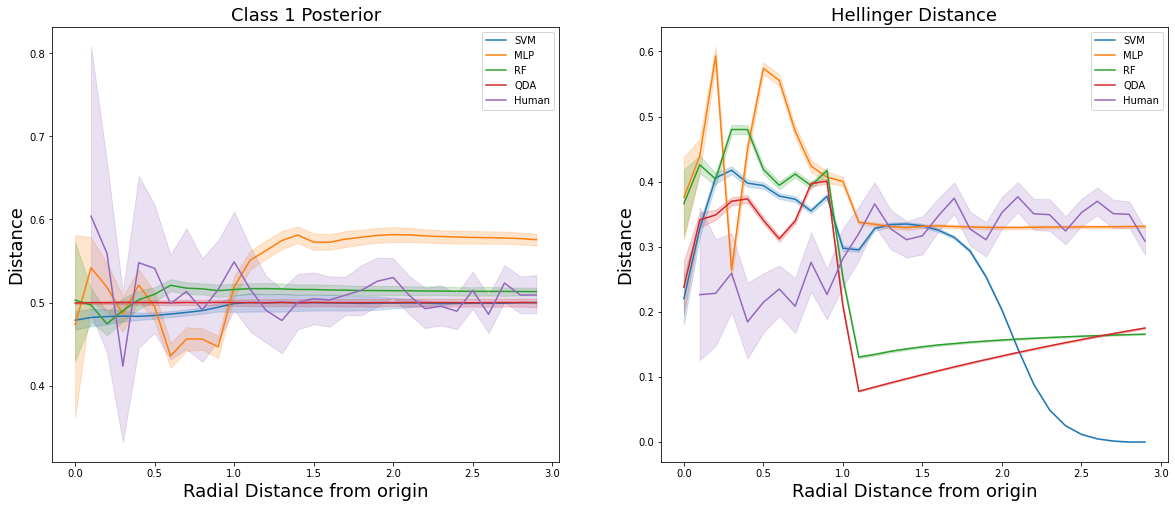

In [237]:
fig, axs = plt.subplots(1,2, figsize=(10*2,8))

for j in range(2):
    for i in range(5):
        
        if i == 4:
            
            hmask = np.column_stack([ib.human[1][:,3], ib.human[1][:,5]])
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[1][:,0]]).astype(float))
            else:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[1][:,6]]).astype(float))
        else:
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][2][i]]))
            else:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[1][2][i]]))

        temp2 = pd.DataFrame(temp[1]).T
        temp2.columns = temp[0]
        temp2 = temp2.melt().dropna()
        temp2.columns=['Radial Distance from origin', 'Distance']
        axs[j].set_title(titles[j], fontsize=fsize)
        axs[j].set_xlabel(temp2.columns[0], fontsize=fsize)
        axs[j].set_ylabel(temp2.columns[1], fontsize=fsize)
        sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i], ax=axs[j])

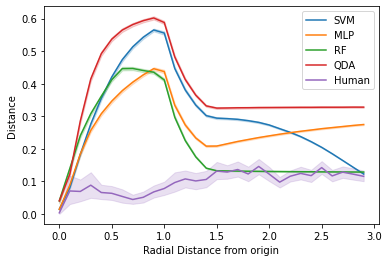

In [226]:
label = ib.mtype + ['Human']

for i in range(5):

    if i == 4:
        hmask = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
        temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,6]]).astype(float))
    else:
        temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[0][4][i]]))

    temp2 = pd.DataFrame(temp[1]).T
    temp2.columns=temp[0]
    temp2 = temp2.melt().dropna()
    temp2.columns=['Radial Distance from origin', 'Distance']
    sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i])

In [ ]:
if cnt == 4:
    for m in range(len(new_mods)-1):
        l1, = axs.plot(rad, pALL_rad[j][m]) # whole range
        lines.append(l1)                        
    # l2, = axs.plot(new_rad[-ii+1], human_pALL_rad[-ii+1]) # different radius range
    l2 = sns.lineplot(human_i[-ii+1], human_p[-ii+1], ci=95) # different radius range
    lines.append(l2)
    axs.legend(lines, new_mods, prop={'size':9})
    axs.set_title('Class 1 Posterior', fontsize=fsize)
elif cnt == 8:
    for m in range(len(new_mods)-1):
        l1, = axs.plot(rad, hALL_rad[j][m]) # whole range
        lines.append(l1)                        
    # l2, = axs.plot(new_rad[-ii+1], human_hALL_rad[-ii+1]) # different radius range
    l2 = sns.lineplot(human_i[-ii+1], human_h[-ii+1], ci=95) # different radius range
    lines.append(l2)
    axs.legend(lines, new_mods, prop={'size':9})
    axs.set_title('Hellinger Distance', fontsize=fsize)
elif cnt == 7:
    axs.set_xlim([-3,3])
    axs.set_ylim([-3,3])
else:
    axs.set_xlim(np.multiply(postrng, 1))
    axs.set_ylim(np.multiply(postrng, 1))